In [699]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.misc import derivative
import random
from sympy import log, cos, symbols, diff

In [700]:
def f(x):
    return (10 - np.cos(2*x) + np.log1p(1+x)) / (10 + x)

In [701]:
b = 5 # Количество узлов интерполяции
n = b + 1
l = 10;
x_array = np.linspace(0+(l/n), l-(l/n), n-1) # задаём узлы интерполяции
#x_array = [0]*(n-1)

#for i in range(n-1):
#    x_array[i] = x_st[i] + l/(n+1)

f_x = [0]*(n-1)
for i in range(n-1):
    f_x[i] = f(x_array[i])

In [702]:
# array - массив узлов, x - параметр из равномерной сетки(100), f_x = массив значений функции в узлах интерполяции
def Ln(x, array, f_x): 

    summary = 0
    
    for i in range(n-1):
        
        coeff_phi = phi(x, i, array)
        coeff_b = f_x[i]
        summary += coeff_b * coeff_phi
    
    return summary

def phi(x, i, arr): # arr - массив узлов, x - параметр из равномерной сетки(100), j - j-ое событие
    res = 1
    
    for j in range(n-1):
        if i != j:
            res *= (x - arr[j])/(arr[i] - arr[j])
            
    return res

In [703]:
k = 100
big_x = np.linspace(0, 10, k)

g_x = [0]*k
Ln_x = [0]*k

for i in range(k):
    g_x[i] = f(big_x[i])
    Ln_x[i] = Ln(big_x[i], x_array, f_x)

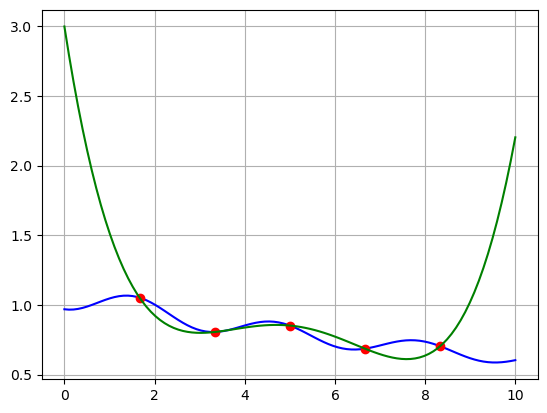

In [704]:
plt.grid(visible=True) 
plt.plot(big_x, g_x, color = 'blue') # Построение графика функции
plt.plot(x_array, f_x, 'o', color = 'red') # Точки - узлы интерполяции
plt.plot(big_x, Ln_x, color = 'green'); # Построение многочлена Лагранжа

In [705]:
def cheb_node(j): # Функция узлов Чебышева
    return 5 + 5*np.cos((np.pi * (2*j + 1)) / (2*n))

In [706]:
x_cheb_node = [0]*(n-1)
f_x_cheb = [0]*(n-1)

for j in range(n-1):
    x_cheb_node[j] = cheb_node(j)
    f_x_cheb[j] = f(x_cheb_node[j])
    
Ln_x_2 = [0]*k

for i in range(k):
    Ln_x_2[i] = Ln(big_x[i], x_cheb_node, f_x_cheb)


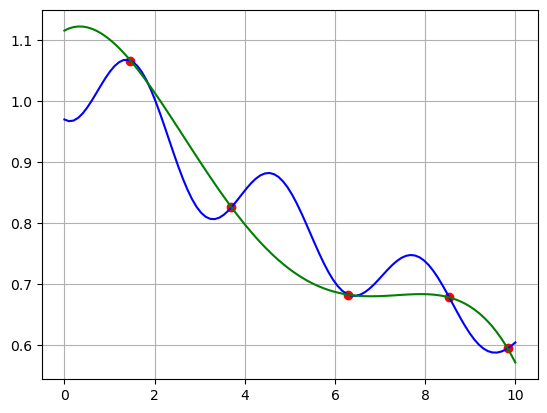

In [707]:
plt.grid(visible=True) 
plt.plot(x_cheb_node, f_x_cheb, 'o', color = 'red')# Узлы Чебышева
plt.plot(big_x, g_x, color = 'blue') # График функции
plt.plot(big_x, Ln_x_2, color = 'green'); # Построение полинома Лагранжа в узлах Чебышева

In [708]:
R_x_h = [0]*k
R_x_ch = [0]*k

for j in range(k):
    R_x_h[j] = abs(g_x[j] - Ln_x[j])
    R_x_ch[j] = abs(g_x[j] - Ln_x_2[j])
gg = [0]*k

In [709]:
def fact(n):
    ss = 1
    
    if n != 0:
        for i in range(1,n+1):
            ss *= i
    return ss

def mult(x_par):
    
    raar = 1
    for d in range(n-1):
        raar *= (x_par - x_array[d])
        
    return raar

In [710]:
x = symbols('x')
f = (10 - cos(2*x) + log(1+x)) / (10 + x)


def f_deriv(f, x, n) : 
    return diff(f,x,n)

ggg = f_deriv(f, x, n+1)
R_x = [0]*k
R_all = [0]*k

for i in range(k):
    R_x[i] =abs(ggg.subs({x: big_x[i]}))
    
r_max = max(R_x)

for j in range(k):
    R_all[j] = abs((1/(fact(n+1))) * r_max * (mult(big_x[j])))

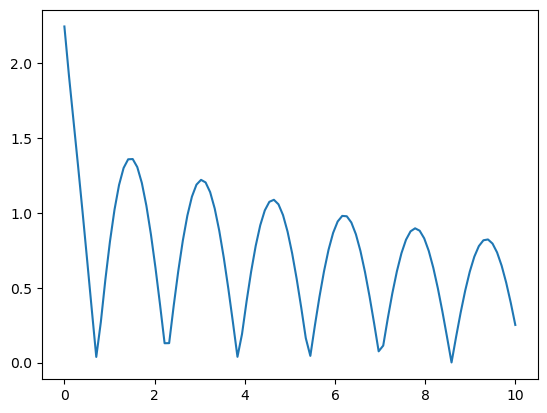

In [711]:
x = symbols('x')
f = (10 - cos(2*x) + log(1+x)) / (10 + x)

gr = f_deriv(f,x,4)
R_gr = [0]*k

for i in range(k):
    R_gr[i] =abs(gr.subs({x: big_x[i]}))
    
plt.plot(big_x, R_gr);

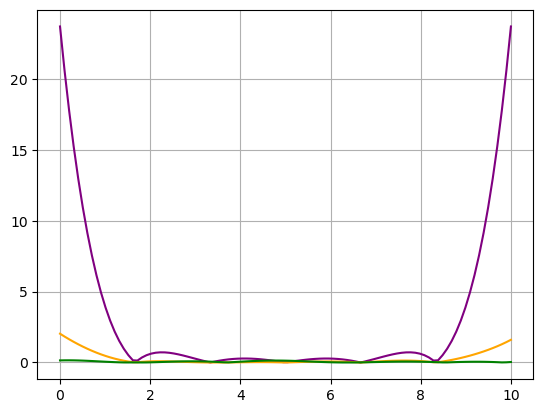

In [712]:
plt.grid(visible=True) 
plt.plot(big_x, R_all, color = 'purple')
plt.plot(big_x, R_x_h, color = 'orange')
plt.plot(big_x, R_x_ch, color = 'green');
#plt.plot(big_x, gg, color = 'red');